<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week08/intro_to_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [64]:
# Custom function to plot predictions and evaluate a model.
def plot_r2(X, y, y_pred):
  # Plot true labels
  plt.scatter(X, y, label = 'True Values');
  # Plot predicted labels
  plt.scatter(X, y_pred, label = 'Predicted Values');
  plt.legend();
  plt.xlabel('X');
  plt.ylabel('y');
  plt.show();
  # Print r2 score
  print('\nR2 Score:', r2_score(y, y_pred))

In [65]:
# Create data
df = make_regression(n_features = 1,
                     n_informative = 1,
                     n_targets = 1,
                     n_samples = 1000,
                     random_state = 42)

Text(0, 0.5, 'y')

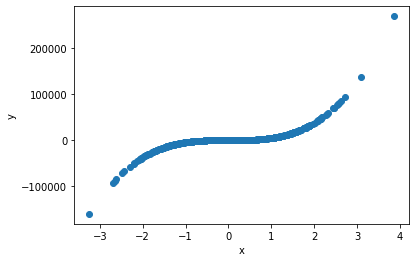

In [66]:
X = df[0]
y = df[1]
y = y ** 3

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

In [67]:
# Validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

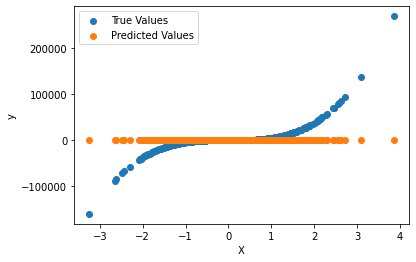


R2 Score: 0.0


In [68]:
# Create a baseline regressor. Use the mean
baseline = DummyRegressor(strategy = 'mean')
baseline.fit(X_train, y_train)
y_pred_1 = baseline.predict(X_train)
plot_r2(X_train, y_train, y_pred_1)

In [69]:
# Create pseudo-residuals
resid_1 = y_train - y_pred_1

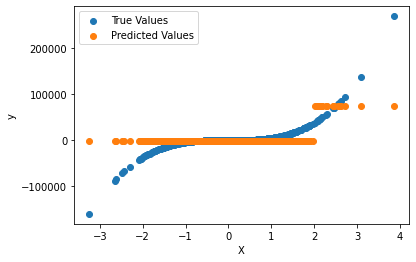


R2 Score: 0.3853730211307187


In [70]:
# Weak tree 1
tree_1 = DecisionTreeRegressor(max_depth = 1)
tree_1.fit(X_train, resid_1)
y_pred_2 = tree_1.predict(X_train)

# Add the predictions
pred = y_pred_1 + y_pred_2

plot_r2(X_train, y_train, pred)

In [71]:
# Second residuals
resid_2 = resid_1 - y_pred_2

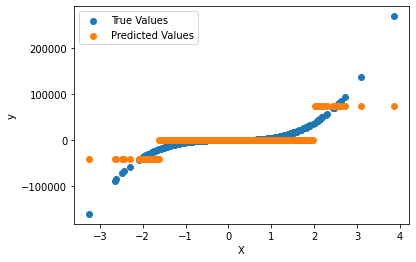


R2 Score: 0.5839918105519601


In [72]:
# Second Weak Tree
tree_2 = DecisionTreeRegressor(max_depth = 1)
tree_2.fit(X_train, resid_2)
y_pred_3 = tree_2.predict(X_train)

pred = y_pred_1 + y_pred_2 + y_pred_3
plot_r2(X_train, y_train, pred)

In [73]:
# Third residuals
resid_3 = resid_2 - y_pred_3

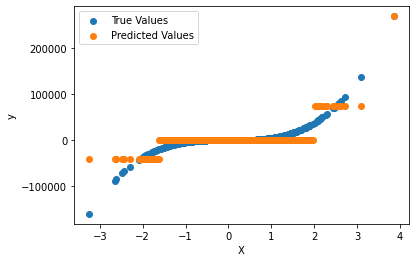


R2 Score: 0.7190134633329139


In [75]:
# Third Weak Tree
tree_3 = DecisionTreeRegressor(max_depth = 1)
tree_3.fit(X_train, resid_3)
y_pred_4 = tree_3.predict(X_train)

pred = y_pred_1 + y_pred_2 + y_pred_3 + y_pred_4
plot_r2(X_train, y_train, pred)

[19:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


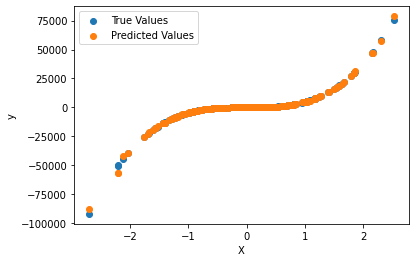


R2 Score: 0.9969380020108349


In [80]:
# Use XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 300, random_state = 42)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

plot_r2(X_test, y_test, preds)